In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [5]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [6]:
tf.random.set_seed(42)
train_generator = train_data_gen.flow_from_directory('FER2013/train',
                                                    target_size=(64,64),
                                                    color_mode="grayscale",
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    seed = 42,
                                                    shuffle = True)

Found 28709 images belonging to 7 classes.


In [7]:
tf.random.set_seed(42)
test_generator = test_data_gen.flow_from_directory('FER2013/test',
                                                  target_size=(64,64),
                                                  color_mode="grayscale",
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  seed = 42)

Found 7178 images belonging to 7 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

# Define the number of classes
no_of_classes = 7

# Create the Sequential model
model_1 = Sequential()

# 1st Convolutional Layer
model_1.add(Conv2D(64, (3, 3), padding='same', input_shape=(64, 64, 1)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

# 2nd Convolutional Layer
model_1.add(Conv2D(128, (3, 3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

# 3rd Convolutional Layer
model_1.add(Conv2D(128, (3, 3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

# 4th Convolutional Layer
model_1.add(Conv2D(512, (3, 3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

#5th Convolutional Layer
model_1.add(Conv2D(512, (3, 3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

# Flatten the output from convolutional layers
model_1.add(Flatten())

# 1st Fully Connected Layer
model_1.add(Dense(256))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.25))

# 2nd Fully Connected Layer
model_1.add(Dense(512))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.25))

# Output Layer
model_1.add(Dense(no_of_classes, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to view the architecture
model_1.summary()

C:\Users\Tanisha\anaconda3\envs\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 512)           │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,840,391 (14.65 MB)

 Trainable params: 3,836,167 (14.63 MB)

 Non-trainable params: 4,224 (16.50 KB)

In [9]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
checkpoint = ModelCheckpoint("./model.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')


# early_stopping = EarlyStopping(monitor='val_loss',
#                           min_delta=0,
#                           patience=3,
#                           verbose=1,
#                           restore_best_weights=True
#                           )

early_stopping = EarlyStopping(monitor = "val_loss",
                               min_delta = 0,
                               patience = 20,
                               verbose = 1,
                               mode = "auto",
                               restore_best_weights = True)


reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

In [10]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [11]:
history_1 = model_1.fit(train_generator,
                       epochs=10,
                       validation_data=test_generator,
                       callbacks=callbacks_list)

Epoch 1/10


C:\Users\Tanisha\anaconda3\envs\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 741s 816ms/step - accuracy: 0.2512 - loss: 1.9255 - val_accuracy: 0.4227 - val_loss: 1.5794 - learning_rate: 0.0010
Epoch 2/10


C:\Users\Tanisha\anaconda3\envs\env\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


898/898 ━━━━━━━━━━━━━━━━━━━━ 553s 615ms/step - accuracy: 0.4418 - loss: 1.4540 - val_accuracy: 0.5050 - val_loss: 1.2902 - learning_rate: 0.0010
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 551s 614ms/step - accuracy: 0.5104 - loss: 1.2892 - val_accuracy: 0.4673 - val_loss: 1.4189 - learning_rate: 0.0010
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 550s 613ms/step - accuracy: 0.5362 - loss: 1.2163 - val_accuracy: 0.5556 - val_loss: 1.1772 - learning_rate: 0.0010
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 550s 612ms/step - accuracy: 0.5633 - loss: 1.1530 - val_accuracy: 0.5339 - val_loss: 1.2351 - learning_rate: 0.0010
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 549s 611ms/step - accuracy: 0.5781 - loss: 1.1129 - val_accuracy: 0.5571 - val_loss: 1.1688 - learning_rate: 0.0010
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 551s 614ms/step - accuracy: 0.5900 - loss: 1.0834 - val_accuracy: 0.5942 - val_loss: 1.0866 - learning_rate: 0.0010
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 551s 613ms/step - accuracy: 0.6107 

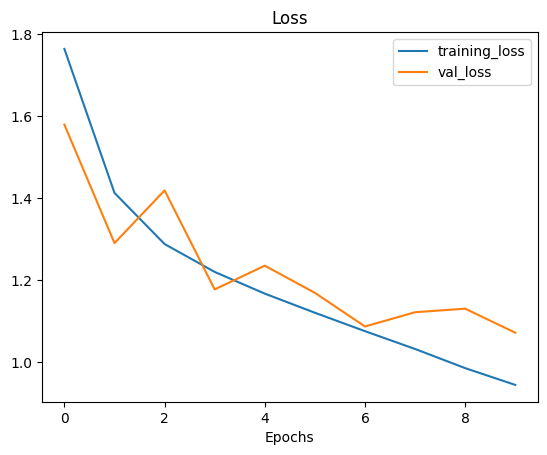

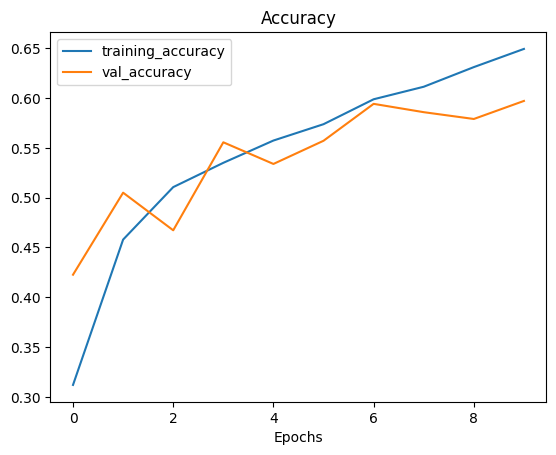

In [16]:
plot_loss_curves(history_1)

In [17]:
model_1.predict(test_generator)

225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step


array([[1.27061992e-03, 5.39358407e-05, 3.17979674e-03, ...,
        1.51014505e-02, 1.70434138e-03, 1.85156136e-03],
       [3.10939755e-02, 3.02827358e-03, 4.54759926e-01, ...,
        1.13394670e-01, 3.33527684e-01, 1.64284576e-02],
       [1.33421510e-01, 9.40409838e-04, 2.31736768e-02, ...,
        6.16314486e-02, 3.52342911e-02, 2.02582078e-03],
       ...,
       [5.43868449e-03, 2.01256262e-04, 1.46833509e-01, ...,
        9.47883502e-02, 5.89807220e-02, 6.85577095e-01],
       [2.03395009e-01, 8.39791372e-02, 2.23958001e-01, ...,
        4.18997854e-02, 4.23315942e-01, 3.30167566e-03],
       [2.40594556e-04, 8.06016772e-07, 3.13004968e-03, ...,
        9.53499880e-03, 2.84411642e-03, 1.03553361e-03]], dtype=float32)

In [18]:
model_1_json = model_1.to_json()
with open("CNN.json", "w") as json_file:  # Change the filename here
    json_file.write(model_1_json)

In [19]:
model_1.save_weights('CNN.weights.h5')